<b>DADOS  :</b> Balanceados --> Undersampling

<b>CODIFICACAO:</b> Label Encoding

<b>ALGORITMO:</b> Arvore de Decisao

In [3]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn import tree
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("../../Database/3.Dados_Transformados/dados_LabelEncoding_UnderSampling.csv")

In [12]:
X = df.values[:,:6] # Atributos
Y = df.values[:,6]  # Rotulo

In [13]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=test_size, random_state = 100)

In [14]:
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
print("Acurácia : ", metrics.accuracy_score(y_test, y_pred))
print("Recall   : ", metrics.recall_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("F1 Score : ", metrics.f1_score(y_test, y_pred))

Acurácia :  0.682795698925
Recall   :  0.736842105263
Precision:  0.673076923077
F1 Score :  0.70351758794


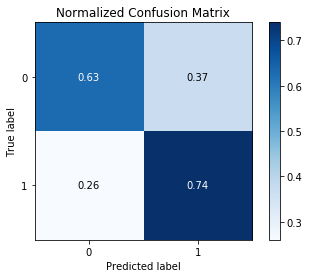

In [18]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.savefig("../5. Interpretacao/M2_MatrizConfusao_Undersampling_LabelEncoding_Arvore.png", dpi=1000, transparent=True)

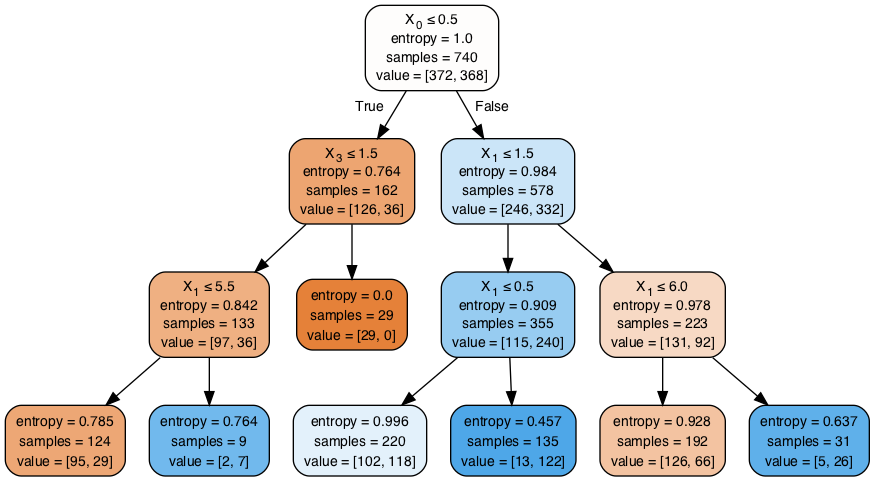

In [19]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Salvando o modelo

In [23]:
import pickle
filename = "Modelos/M2_Undersampling_LabelEncoding_Arvore.sav"
pickle.dump(classifier, open(filename, 'wb'))

---